# <span style ='color:#74B72E'>Stock Market Analysis - Time Series 
## <span style ='color:#FCA510'> <bu>EXPLORATORY NOTEBOOK</bu>

- by Annie Carter
- Sourced by Yahoo Finance

![Image-3.png](https://images.theconversation.com/files/526640/original/file-20230516-23-zv2vps.jpg?ixlib=rb-1.1.0&rect=121%2C80%2C4372%2C2910&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip)

 Custom Palette = Pear#74B72E, Fire #FCA510

In [2]:
# Wrangle
# import wrangle as w
import os

# Transform 
import numpy as np
import pandas as pd

# Visualize 
import matplotlib.pyplot as plt
import seaborn as sns

# Working with dates
from datetime import datetime

# Modeling
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pylab import rcParams
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
## pip install statsmodels 
## pip install pmdarima

# Evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

## <span style ='color:#74B72E'>ACQUIRE

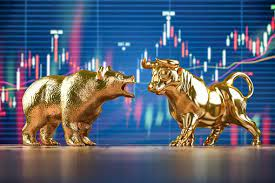

#### Acquired stock market data from Yahoo Finance for Nike, Coca-Cola, Boeing
- Downloaded stock csv. for last 5 years of daily stock market values
- Add Symbol column for each stock dataframe
- concated data frames by Symbol
- 8 columns, 1758 rows 
- Checked for nulls (0) and duplications (0)

In [3]:
# # def prep_stocks():
#      ''' 
# # The below functions prepares aaple, Microsoft, Visa and American Express 
#     '''
# Save and read dataset csv from yahoo.finance.com
df_aapl = pd.read_csv('AAPL.csv')
df_msft = pd.read_csv('MSFT.csv')  
df_v = pd.read_csv('V.csv')
df_axp = pd.read_csv('AXP.csv')

In [4]:
df_aapl['Symbol'] = 'AAPL'

In [5]:
df_aapl.to_csv('df_aapl.csv', index=False)

In [6]:
#Convert 'Date' into datetime dtype
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df_aapl = pd.read_csv('df_aapl.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

In [7]:
df_aapl.head(2)

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2018-08-15,52.3050,52.685001,52.0825,52.560001,50.338474,115230400,AAPL
2018-08-16,52.9375,53.452499,52.8675,53.330002,51.075951,114001600,AAPL


In [ ]:
df_aapl.describe()

In [ ]:
df_msft.tail(2)

In [8]:
df_msft['Symbol'] = 'MSFT'

In [9]:
df_msft.to_csv('df_msft.csv', index=False)

In [10]:
#Convert 'Date' into datetime dtype
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df_msft = pd.read_csv('df_msft.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

In [11]:
df_msft.tail(2)

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2023-08-11,320.260010,322.410004,319.209991,321.010010,321.010010,24342600,MSFT
2023-08-14,321.390015,324.059998,320.079987,324.040009,324.040009,18808100,MSFT


In [ ]:
df_msft.describe()

In [12]:
df_v['Symbol'] = 'V'

In [13]:
df_v.to_csv('df_v.csv', index=False)

In [14]:
#Convert 'Date' into datetime dtype
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df_v = pd.read_csv('df_v.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

In [ ]:
df_v.describe()

In [15]:
df_axp['Symbol'] = 'AXP'

In [16]:
df_axp.to_csv('df_axp.csv', index=False)

In [17]:
#Convert 'Date' into datetime dtype
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df_axp = pd.read_csv('df_axp.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

In [18]:
df_axp.head(2)

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2018-08-15,101.570000,101.930000,100.839996,101.510002,94.560913,2219600,AXP
2018-08-16,101.900002,103.139999,101.870003,102.650002,95.622833,2290400,AXP


In [19]:
print(f'Apple dataframe shape: {df_aapl.shape}')
print (f'Microsoft dataframe shape: {df_msft.shape}')
print(f'Visa dataframe shape: {df_v.shape}')
print(f'American Express dataframe shape: {df_axp.shape}')

Apple dataframe shape: (1257, 7)
Microsoft dataframe shape: (1257, 7)
Visa dataframe shape: (1257, 7)
American Express dataframe shape: (1257, 7)


##  <span style ='color:#74B72E'>PREPARE
- **Data Transformation:** Concat the 3 stock dataframes into 1 dataframe; convert 'Date' to DateTime
- **Handling Missing Values:** 0 nulls

- **Removing Duplicates:** 0 duplictes

- **Data Cleaning:** 0 outliers
- **Feature Selection:** Predicting Future Stock Values 'close'

# TRIAL BY 🔥🔥 LESSONS LEARNED

#### I realized the original data sets did not have same of rows. Be sure to download equal number of days in for CSV. Did head and tail to make sure that they had the same amount of days and both started and finished at the same time. I deleted one row from aapl, it was a day ahead. 
#### Rescraped data changed stock symbols to AAPL, MSFT, V, and AXP
#### intially tried to do multiple time comparisons at once e.g., AAPL MSFT ... need to crawl before walk. 
#### Broke down Time Series by independt Stock Symbol e.g., AAPL and Multiple Analysis of AAPL closing price Modeled using 
#### Initially, I started using ARIMA, which is a way to predict future values based on patterns in past data. But then I switched to using SARIMAX, which is like an upgraded version. SARIMAX can also predict future values, but it's better for data that has repeating patterns, like if something happens every month or every year. It's also good at considering outside factors that might affect the data, things like weather or economic changes. So, I chose SARIMAX because it's more versatile and can handle different situations, especially when the data has a clear repeating pattern and is influenced by other things happening around it.


![Image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxvlo2vR0tw3r_g4aTkbwSaOnHPJucvfIwuQ&usqp=CAU)

In [20]:
#this creates a variables containing both dataframes created above
frames = [df_aapl, df_msft, df_v, df_axp]
 

In [21]:
#this creates a new dataframe using the above variable and combining both dataframes
df_stocks = pd.concat(frames)  
df_stocks.sample(5)

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2021-10-01,282.119995,289.980011,281.290009,289.100006,284.556854,30086300,MSFT
2022-05-05,212.270004,214.580002,203.070007,205.240005,202.854019,7749600,V
2020-01-13,161.759995,163.309998,161.259995,163.279999,157.995941,21626500,MSFT
2022-09-15,249.770004,251.399994,244.020004,245.380005,243.546677,31530900,MSFT
2019-11-01,144.259995,144.419998,142.970001,143.720001,138.597351,33128400,MSFT


In [ ]:
# Review shape to determine processing needs, will use sample size due to network restrictions for exploration
df_stocks.shape

In [ ]:
#Review data to look at columns datatypes and nulls
df_stocks.info()

In [22]:
df_stocks.to_csv('df_stocks.csv', index=False)
df_stocks.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2018-08-15,52.305000,52.685001,52.082500,52.560001,50.338474,115230400,AAPL
2018-08-16,52.937500,53.452499,52.867500,53.330002,51.075951,114001600,AAPL
2018-08-17,53.360001,54.487499,53.290001,54.395000,52.095921,141708000,AAPL
2018-08-20,54.525002,54.794998,53.777500,53.865002,51.588326,121150800,AAPL
2018-08-21,54.200001,54.297501,53.507500,53.759998,51.487755,104639200,AAPL


In [ ]:
df_stocks.isnull().sum()

In [23]:
#Make 'Date' column index of Dataframe
df_stocks.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5028 entries, 2018-08-15 to 2023-08-14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5028 non-null   float64
 1   High       5028 non-null   float64
 2   Low        5028 non-null   float64
 3   Close      5028 non-null   float64
 4   Adj Close  5028 non-null   float64
 5   Volume     5028 non-null   int64  
 6   Symbol     5028 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 314.2+ KB


## <span style ='color:#FCA510'>APPLE TIME-SERIES FINDINGS

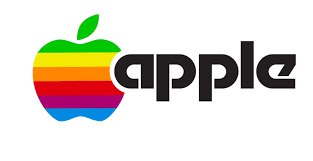


### <span style ='color:#757C88'> AAPL Close Last Obsevered

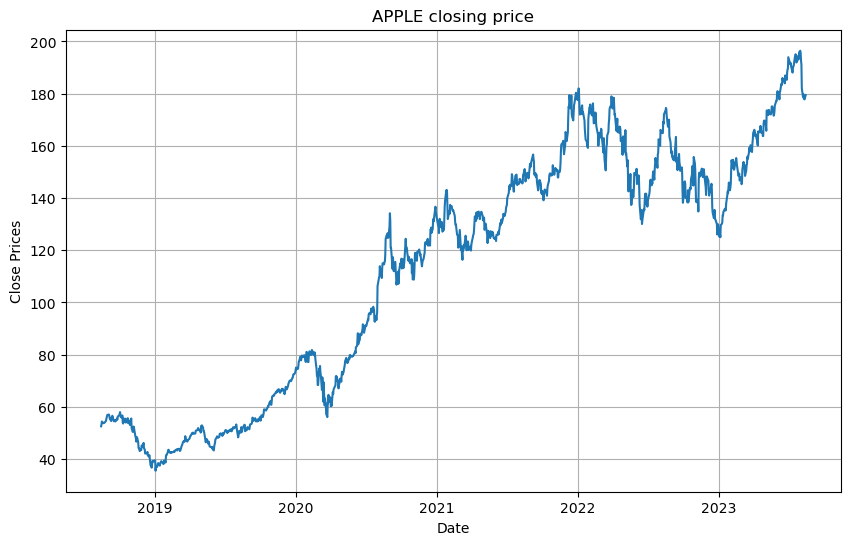

In [25]:
# Filter the DataFrame for rows with Symbol 'AAPL'
apple_df = df_stocks[df_stocks['Symbol'] == 'AAPL']

#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(apple_df['Close'])
plt.title('APPLE closing price')
plt.show()


In [43]:
apple_close.head()

Date
2018-08-15    52.560001
2018-08-16    53.330002
2018-08-17    54.395000
2018-08-20    53.865002
2018-08-21    53.759998
Name: Close, dtype: float64

### <span style ='color:#757C88'> AAPL CLose KDE Value

<Axes: ylabel='Density'>

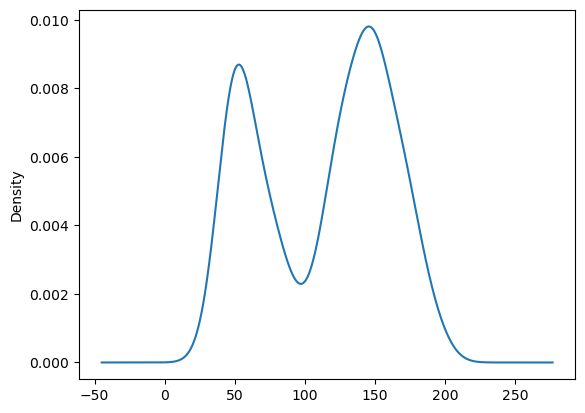

In [27]:
#Distribution of the dataset

apple_close = apple_df['Close']
apple_close.plot(kind='kde')

### <span style ='color:#757C88'>Previous Cycle
### <span style ='color:#757C88'>Holt's Linear Trend
### <span style ='color:#757C88'>Holt's Seasonal Trend

### <span style ='color:#757C88'> Original Close, Rolling Mean, STD and Dickey-Fuller Test to determine stationarity

In [37]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Symbol Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Symbol Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

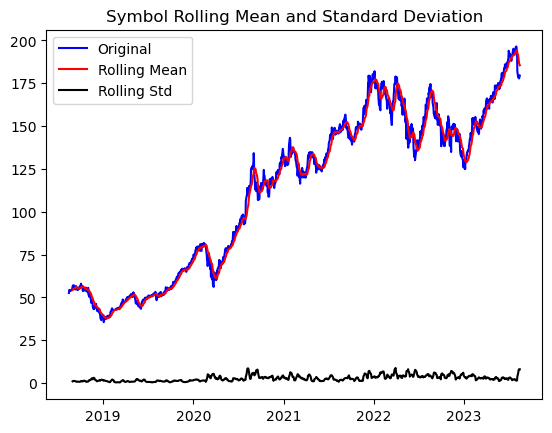

Results of dickey fuller test
Symbol Test Statistics           -0.732989
p-value                           0.838019
No. of lags used                  1.000000
Number of observations used    1255.000000
critical value (1%)              -3.435571
critical value (5%)              -2.863846
critical value (10%)             -2.567998
dtype: float64


In [39]:
test_stationarity(apple_close)

<Figure size 640x480 with 0 Axes>

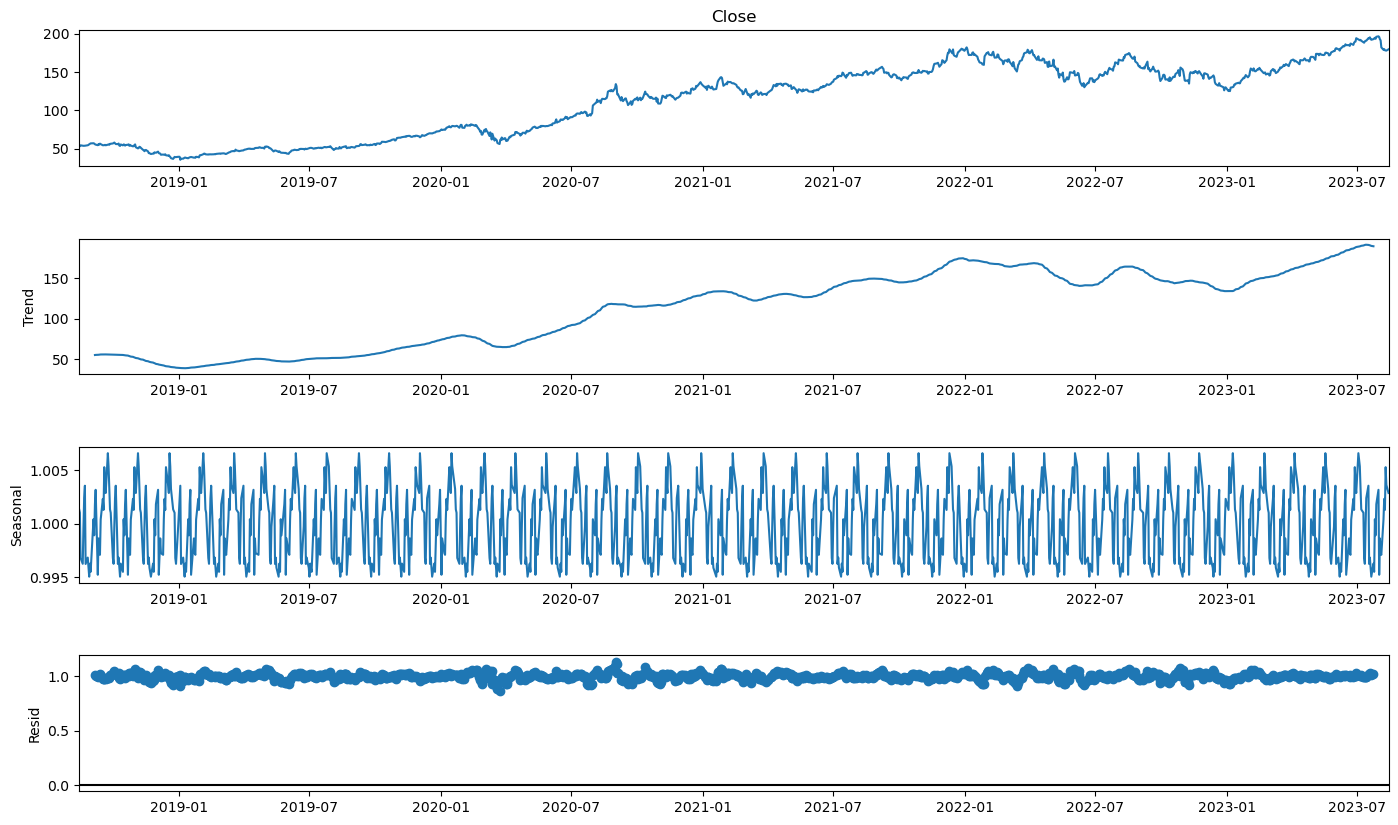

In [50]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(apple_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

### <span style ='color:#757C88'>Apple Symbol Moving Average

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


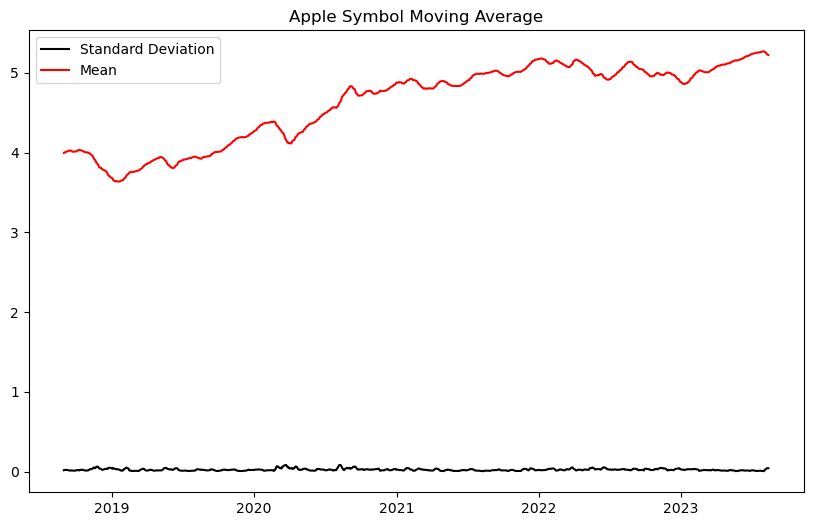

In [52]:
#if not stationary then eliminate trend
#Eliminate trend
rcParams['figure.figsize'] = 10, 6
appl_log = np.log(apple_close)
moving_avg = appl_log.rolling(12).mean()
std_dev = appl_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Apple Symbol Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

### <span style ='color:#757C88'>AAPLE ARIMA model

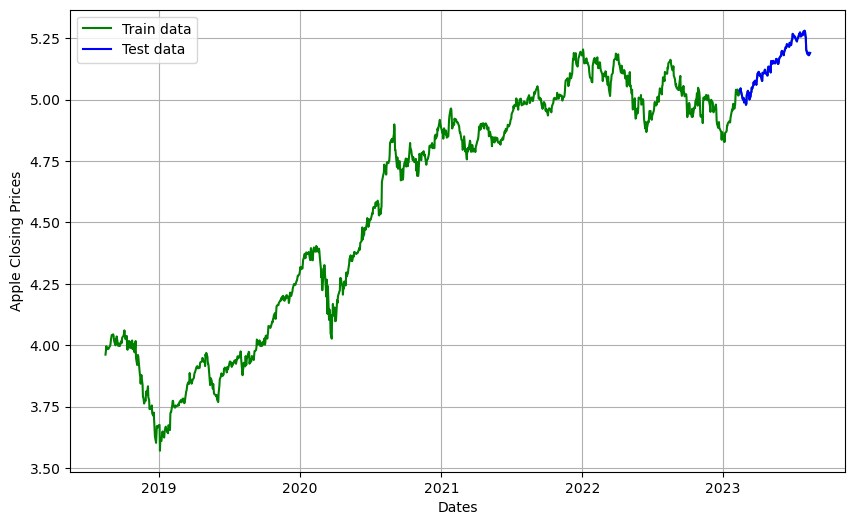

In [73]:
# Create APPLE ARIMA model. Train on Appl stock’s closing price from the train data.training and test sets.

#split data into AAPL train and testing  set
aapl_train_data, aapl_test_data = appl_log[3:int(len(appl_log)*0.9)], appl_log[int(len(appl_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Apple Closing Prices')
plt.plot(appl_log, 'green', label='Train data')
plt.plot(aapl_test_data, 'blue', label='Test data')
plt.legend()

The auto_arima tool makes a detailed ARIMA model by making its settings better. It's like getting ideas from a famous tool called forecast::auto.arima in R. This tool uses tests (like Kwiatkowski–Phillips–Schmidt–Shin and Augmented Dickey-Fuller) to find the best 'd' value, which is important. Then, it changes the 'p' and 'q' values in certain ranges to make the autoregressive and moving average parts better.

When we want to see patterns that repeat, auto_arima uses the Canova-Hansen way to figure out how much we should change the data to make it better ('D'). It also finds the best numbers for 'P' and 'Q'. With this smart method, auto_arima makes it easier to build a great ARIMA model with the best settings. This helps us get more accurate results.

### <span style ='color:#757C88'>APPL SARIMAX model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5425.443, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5441.329, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5441.351, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5425.453, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5439.385, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-5439.365, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5437.392, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-5440.711, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.780 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1128
Model:               SARIMAX(0, 1, 1)   Log Likelihood                2723.675
Date:                Sun, 20 Aug 2023   AIC                          -5441.351
Time:                       

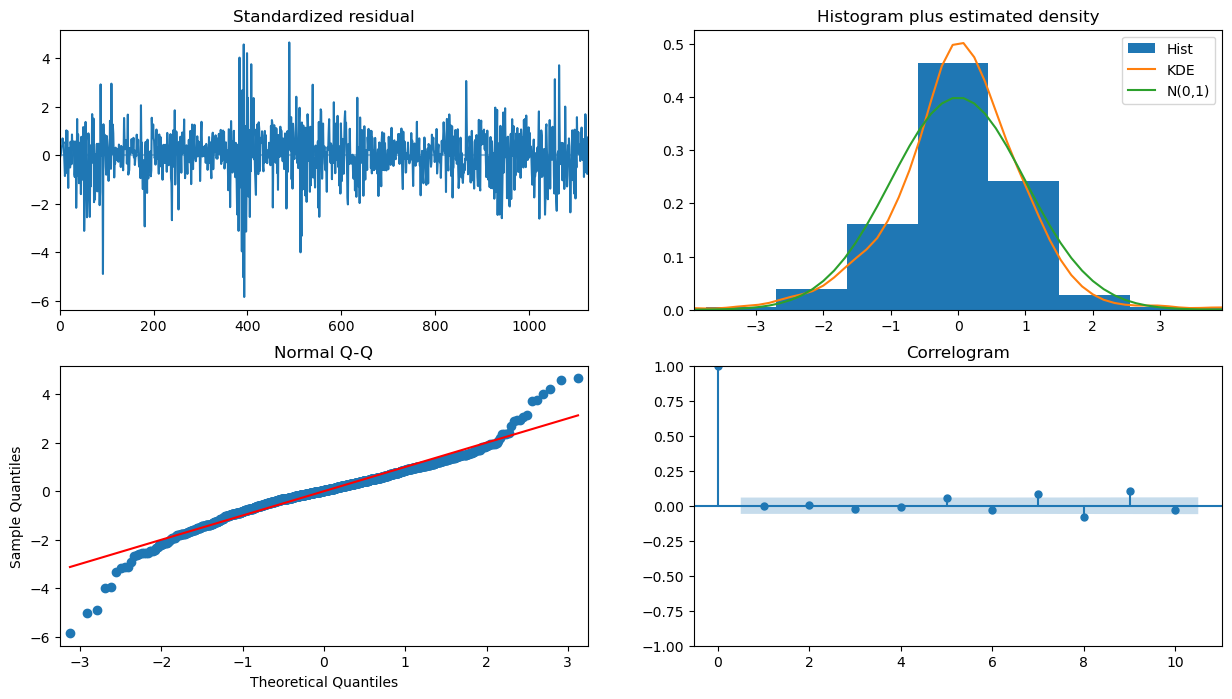

In [59]:
aapl_model_autoARIMA = auto_arima(aapl_train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(aapl_model_autoARIMA.summary())
aapl_model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Top left: The errors left behind after making predictions seem to have a steady range and move around an average of zero.

Top right: The shape of the plot at the top right suggests that the numbers are spread out normally, and their average is zero.

Bottom left: The red line should match up perfectly with all the dots. If it doesn’t, it could mean the numbers are not evenly distributed.

Bottom right: The leftover errors don’t show minimal connection between them, as seen in the Correlogram or ACF plot. If there was a connection, it would mean the errors have a pattern that the model can't explain. To fix that, you would need to include more predictors in the model.

In [67]:
# Build SARIMAX Model
aapl_model = SARIMAX(aapl_train_data, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
aapl_fitted = aapl_model.fit(disp=-1)
print(aapl_fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1128
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                2666.276
Date:                            Sun, 20 Aug 2023   AIC                          -5326.552
Time:                                    10:18:18   BIC                          -5311.502
Sample:                                         0   HQIC                         -5320.862
                                           - 1128                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1226      0.021     -5.848      0.000      -0.164      -0.082
ma.S.L12      -0.9996      0.714   

will continue to forecast AAPPL stock prices 

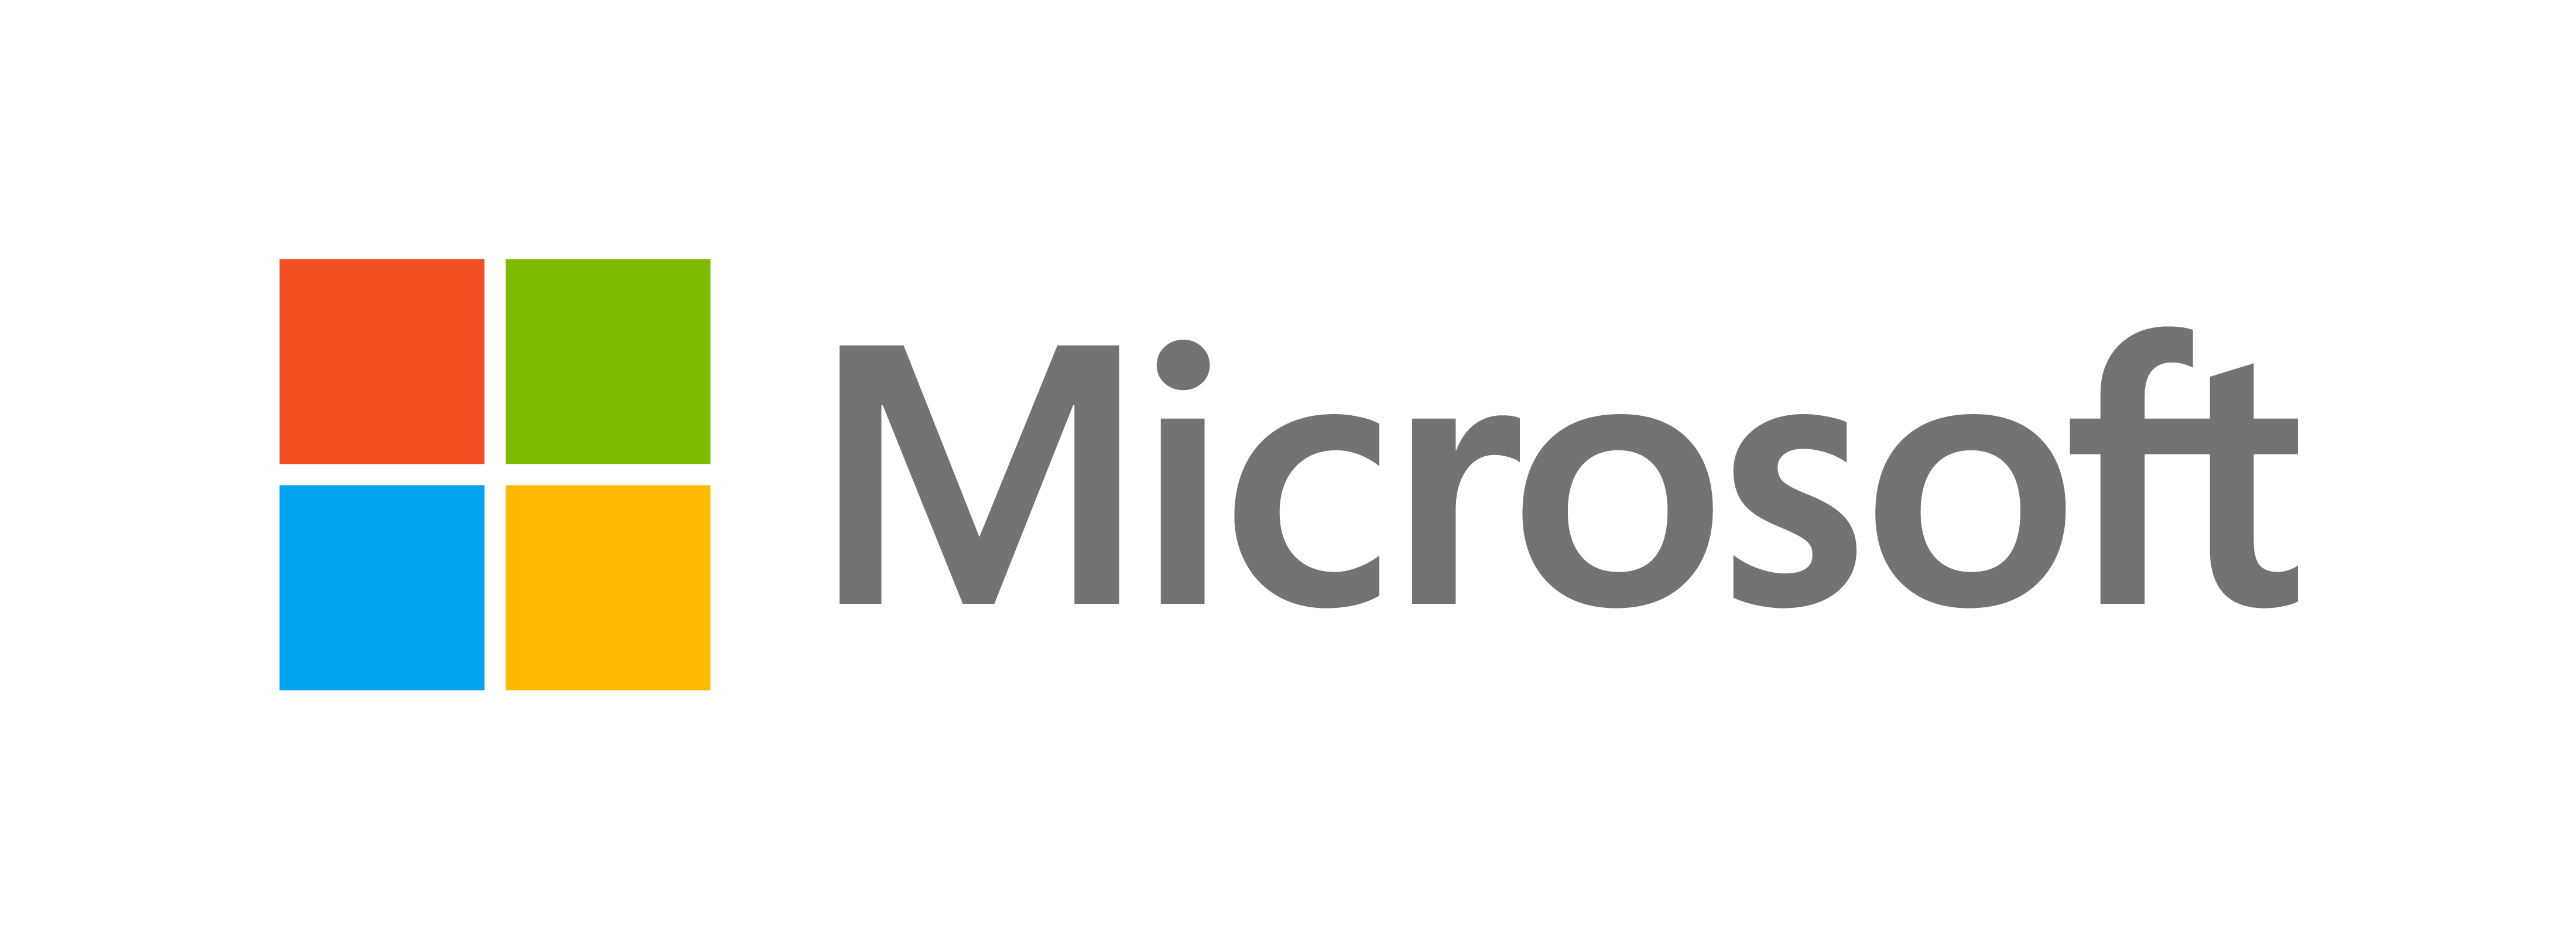

In [2]:
# Filter the DataFrame for rows with Symbol 'MSFT'
msft_df = df_stocks[df_stocks['Symbol'] == 'MSFT']

#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(apple_df['Close'])
plt.title('Microsoft closing price')
plt.show()

NameError: name 'df_stocks' is not defined

In [ ]:
#created sample DF with random state of 42 to review and clean data rapidly
df_stocks.head(2)


# <span style ='color:#FCA510'>UNDER CONSTRUCTION FUNCTIONS AND CODES USED TO EXPLORE 
## PREPARATION FUNCTIONS FOR FINAL NOTEBOOK 
Many scrapped or still need debugging.
    
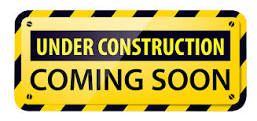

In [1]:
# #Forecasting AAPL stock prices on the test dataset with a 95% confidence level.

# # Forecast
# fc, se, conf = aapl_fitted.forecast(321, alpha=0.05)  # 95% conf

# aapl_fc_series = pd.Series(fc, index=aapl_test_data.index)
# aapl_lower_series = pd.Series(conf[:, 0], index=aapl_test_data.index)
# aapl_upper_series = pd.Series(conf[:, 1], index=aapl_test_data.index)
# # Plot
# plt.figure(figsize=(10,5), dpi=100)
# plt.plot(aapl_train_data, label='APPL training data')
# plt.plot(aapl_test_data, color = 'blue', label='Actual AAPL Stock Price')
# plt.plot(aapl_fc_series, color = 'orange',label='Predicted AAPL Stock Price')
# plt.fill_between(aapl_lower_series.index, aapl_lower_series, aapl_upper_series, 
#                  color='k', alpha=.10)
# plt.title('APPLE Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('APPLE AAPL Stock Price')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()


In [ ]:
#Min date Aug 14 2018 - Aug 15 2023, 5 year lookvck of stocks
df_stocks.index.min(), df_stocks.index.max()

In [ ]:
df_stocks.Open.plot()

In [ ]:

# train = df_stocks.resample('D').groupby('Symbol')['close_price'].sum()
# train = pd.DataFrame(train)

# train_size = 0.70
# n = df_stocks.shape[0]
# test_start_index = round(train_size * n)
# train_targets = ['Close', 'Symbol']

# train = df_stocks[train_targets][:test_start_index]  # Select columns and rows for training
# test = df_stocks[train_targets][test_start_index:]   # Select columns and rows for testing
# # Reset the index of the 'train' DataFrame to access the date information
# train.reset_index(inplace=True)

# # Create additional columns based on the index
# train["year"] = train['Date'].dt.year
# train["month"] = train['Date'].dt.strftime('%B')  # Full month name
# train["week_day"] = train['Date'].dt.strftime('%A')  # Full day name
# train["day_of_month"] = train['Date'].dt.day
# train["month_number"] = train['Date'].dt.month
# train["week_day_number"] = train['Date'].dt.weekday

# train.head()
import pandas as pd
train_size = 0.70
n = df_stocks.shape[0]
test_start_index = round(train_size * n)

# Select the appropriate columns and rows for training and testing
train_data = df_stocks.iloc[:test_start_index]
test_data = df_stocks.iloc[test_start_index:]

# Assuming 'df_stocks' is the DataFrame containing stock data and 'Symbol' is the column containing stock symbols
# Replace 'close_price' with the actual column name for the stock's closing price

train_data = pd.DataFrame(train_data)



# Reset the index of the 'train_data' DataFrame to access the date information
train_data.reset_index(inplace=True)

# Create additional columns based on the index
train_data["year"] = train_data['Date'].dt.year
train_data["month"] = train_data['Date'].dt.strftime('%B')  # Full month name
train_data["week_day"] = train_data['Date'].dt.strftime('%A')  # Full day name
train_data["day_of_month"] = train_data['Date'].dt.day
train_data["month_number"] = train_data['Date'].dt.month
train_data["week_day_number"] = train_data['Date'].dt.weekday

train_data.head()



In [ ]:
#import matplotlib.pyplot as plt

# Assuming 'train_data' and 'test_data' are the DataFrames for training and testing data
train_size = train_data.groupby('Symbol')['Close'].sum()
test_size = test_data.groupby('Symbol')['Close'].sum()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Plotting the 'close_price' column for training and testing
plt.plot(train_size.index, train_size, label='Train close_price')
plt.plot(test_size.index, test_size, label='Test close_price')

# Plotting the 'Symbol' column for training and testing (using a second y-axis)
ax2 = plt.gca().twinx()  # Create a second y-axis sharing the same x-axis
ax2.plot(train_size.index, train_size.index, color='orange', label='Train Symbol')
ax2.plot(test_size.index, test_size.index, color='green', label='Test Symbol')
ax2.set_ylabel('Symbol', color='orange')  # Set y-axis label for the 'Symbol' column
ax2.tick_params(axis='y', labelcolor='orange')  # Set y-axis tick color

# Set x-axis label and title
plt.xlabel('Date')
plt.title('Stock Price and Symbol by Date')

# Add legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()  # Show the plot



In [ ]:
import matplotlib.pyplot as plt

# Assuming 'train_data' and 'test_data' are the DataFrames for training and testing data
symbols_to_plot = ['AAPL', 'MSFT']

# Filter train_data and test_data to include only 'AAPL' and 'MSFT' symbols
train_data_filtered = train_data[train_data['Symbol'].isin(symbols_to_plot)]
test_data_filtered = test_data[test_data['Symbol'].isin(symbols_to_plot)]

train_size = train_data_filtered.groupby('Symbol')['Close'].sum()
test_size = test_data_filtered.groupby('Symbol')['Close'].sum()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Plotting the 'Close' column for training and testing
plt.plot(train_size.index, train_size, label='Train Close')
plt.plot(test_size.index, test_size, label='Test Close')

# Plotting the 'Symbol' column for training and testing (using a second y-axis)
ax2 = plt.gca().twinx()  # Create a second y-axis sharing the same x-axis
ax2.plot(train_size.index, train_size.index, color='orange', label='Train Symbol')
ax2.plot(test_size.index, test_size.index, color='green', label='Test Symbol')
ax2.set_ylabel('Symbol', color='orange')  # Set y-axis label for the 'Symbol' column
ax2.tick_params(axis='y', labelcolor='orange')  # Set y-axis tick color

# Set x-axis label and title
plt.xlabel('Date')
plt.title('Stock Price and Symbol by Date')

# Add legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()  # Show the plot


In [ ]:
#target variable "Close" df saved for training
y = train[['Close', 'Symbol']]
y.head()

In [ ]:
#This is a graph of rolling average grouped by symbol and resampled by W

# Group by 'Symbol' and resample to weekly frequency while calculating the mean
weekly_mean_df = df_stocks.groupby('Symbol').resample('W')['Close'].mean()

# Calculate rolling averages for 'v', 'aapl', and 'msft' with window sizes of 3, 5, and 7 days
rolling_df = pd.DataFrame()
for symbol in ['AAPL', 'MSFT']:
    for window_size in [3, 5, 7]:
        rolling_avg = weekly_mean_df.loc[symbol].rolling(window_size).mean()
        column_name = f'rolling_{window_size}_{symbol}'
        rolling_df[column_name] = rolling_avg

# Plot the rolling averages
rolling_df.plot()
# Add legend and move it to the far right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Add ylabel
plt.ylabel('Stock Close Price Rolling Average')
plt.show()

In [ ]:
#This is a graph of rolling average grouped by symbol and resampled by W

# Group by 'Symbol' and resample to weekly frequency while calculating the mean
weekly_mean_df = df_stocks.groupby('Symbol').resample('W')['Close'].mean()

# Calculate rolling averages for 'V, 'AXP' with window sizes of 3, 5, and 7 days
rolling_df = pd.DataFrame()
for symbol in ['V', 'AXP']:
    for window_size in [3, 5, 7]:
        rolling_avg = weekly_mean_df.loc[symbol].rolling(window_size).mean()
        column_name = f'rolling_{window_size}_{symbol}'
        rolling_df[column_name] = rolling_avg

# Plot the rolling averages
rolling_df.plot()
# Add legend and move it to the far right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Add ylabel
plt.ylabel('Stock Close Price Rolling Average')
plt.show()

In [ ]:
#Plot of stocks by month
df_stocks.Close.resample('M').mean().plot(marker='o')

In [ ]:
# Resample by year and calculate the mean close price
y_year = y.groupby(['AAPL', pd.Grouper(freq='Y')])['Close'].mean()

plt.figure(figsize=(45, 30)) 

# Plotting the average close price by month for different symbols
ax = y_year.unstack('Symbol').plot(kind='vr', width=0.9, ec='black')

plt.xticks(rotation=45)
ax.set(title='Average Close Price by Year', xlabel='Year', ylabel='Close')

plt.legend(title='Symbol')


plt.show()  # Show the plot



In [ ]:
plt.figure(figsize=(8,4))
train.df_aapl.resample('D').mean().plot(alpha=.5, label='Daily')
train.df_aapl.resample('W').mean().plot(alpha=.8, label='Weekly')
train.df_aapl.resample('M').mean().plot(label='Montly')
train.df_aapl.resample('Y').mean().plot(label='Yearly')
plt.title('Stock Symbols')
plt.xlabel('Average Close Price by Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Resample by week and calculate the mean close price
y_week = y.groupby(['Symbol', pd.Grouper(freq='W')])['Close'].mean()

# Filter for the year 2023
y_week_2023 = y_week.loc[y_week.index.year == 2023]

# Sort the data
y_week_2023_sorted = y_week_2023.sort_values(ascending=False)

# Plot the average close price by weekday for the year 2023
ax = y_week_2023_sorted.groupby(y_week_2023_sorted.index.day_name()).mean().plot.vr(width=0.9, ec='black')

plt.xticks(rotation=90)
ax.set(title='Average Close Price by Weekday (Year 2023)', xlabel='Weekday', ylabel='Close')

plt.show()


In [ ]:
y_week.index.info()

In [ ]:
#Average close price by Month and Symbol. Unequal dataframes. 

# Assuming 'y' is your DataFrame containing the data

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Group by month and symbol, calculate the mean, and create a vr plot
ax = y.groupby([y.index.month, 'Symbol']).mean().unstack()['Close'].plot.vr(width=0.9, ec='black')

plt.xticks(rotation=0)
ax.set(title='Average Close Price by Month and Symbol', xlabel='Month', ylabel='Close price')
plt.legend(title='Symbol')  # Add legend with 'Symbol' title

plt.show()  # Show the plot


In [ ]:
# Assuming 'y' is your DataFrame containing the data

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Create a stacked histogram using Seaborn
ax = sns.histplot(data=y, x='Close', hue='Symbol', multiple='stack', bins=20, element='step', linewidth=1.5)

plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Close Prices by Symbol')

plt.legend(title='Symbol') 

plt.show()  # Show the plot



In [ ]:
# ## CODE FAILED NEED TO ADJUST
# ## need to adjust dataframe rows so that all symbols have same # of rows in dataframe. 


# plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# # Create separate histograms for each symbol using Seaborn
# ax1 = sns.histplot(data=y[y['Symbol'] == 'v'], x=y.index.month, bins=20, element='step', linewidth=1.5, label='Symbol v')
# ax2 = sns.histplot(data=y[y['Symbol'] == 'msft'], x=y.index.month, bins=20, element='step', linewidth=1.5, label='Symbol msft')

# plt.xlabel('Month')
# plt.ylabel('Frequency')
# plt.title('Stacked Histogram of Close Prices by Symbol and Month')

# plt.legend(title='Symbol') 

# plt.show()  # Show the plot


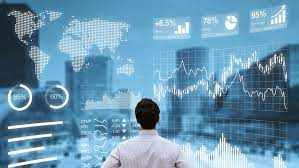

In [ ]:
aapl_data = y[y['Symbol'] == 'AAPL']
aapl_data.resample('D').mean().plot(alpha=0.5, label='Daily')
aapl_data.resample('W').mean().plot(alpha=0.8, label='Weekly')
aapl_data.resample('M').mean().plot(label='Monthly')
aapl_data.resample('Y').mean().plot(label='Yearly')

plt.title("Apple Stock Growth Over Time")
plt.xlabel('Apple Stock Date')
plt.ylabel('Average Stock Price')
plt.legend()
plt.tight_layout() 
plt.show()

In [ ]:
# Yearly Apple Close Price bits
plt.figure(figsize=(7,3))
y.groupby("Date").aaple_data.mean().plot(kind="bar", color=colors)
plt.title("Monthly Apple Stock Close")
plt.xticks(range(12), x_labels)
plt.xlabel("Month")
plt.ylabel("Price")
plt.xticks(rotation=0)
plt.show()

In [ ]:
aapl_data = y[y['Symbol'] == 'MSFT']
aapl_data.resample('D').mean().plot(alpha=0.5, label='Daily')
aapl_data.resample('W').mean().plot(alpha=0.8, label='Weekly')
aapl_data.resample('M').mean().plot(label='Monthly')
aapl_data.resample('Y').mean().plot(label='Yearly')

plt.title("Microsoft Stock Growth Over Time")
plt.xlabel('Microsoft Sttock Date')
plt.ylabel('Average Stock Price')
plt.legend()
plt.tight_layout() 
plt.show()

In [ ]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
mean_stocks = train[train['Symbol'] == 'AAPL'].groupby('Year')['df_stocks'].mean()

mean_stocks.plot(kind="bar")
plt.title("Yearly Mean of AAPL Stock")
plt.xlabel("Year")
plt.ylabel("Mean Stock Value")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
df_resampled = df_stocks.resample('M')[['quantity','sales_total']].sum()

# Drop February 29th from our dataset (a leap year date)
df_resampled = df_resampled[df_resampled.index != '%02-29']

##  <span style ='color:#74B72E'>DATA SPLIT

In [ ]:
train_size = int(len(df_stocks) * .5)
validate_size = int(len(df_stocks_resampled) * .3)
test_size = int(len(df_resampled) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = df_resampled[: train_size]
validate = df_resampled[train_size : validate_end_index]
test = df_resampled[validate_end_index : ]

#### DATA VISUALIZATION FINDINGS :


## <span style ='color:#FCA510'>MICROSOFT TIMES-SERIES FINDINGS?

#### DATA VISUALIZATION FINDINGS :

## <span style ='color:#FCA510'> AMERICAN EXPRESS TIMES-SERIES FINDINGS?

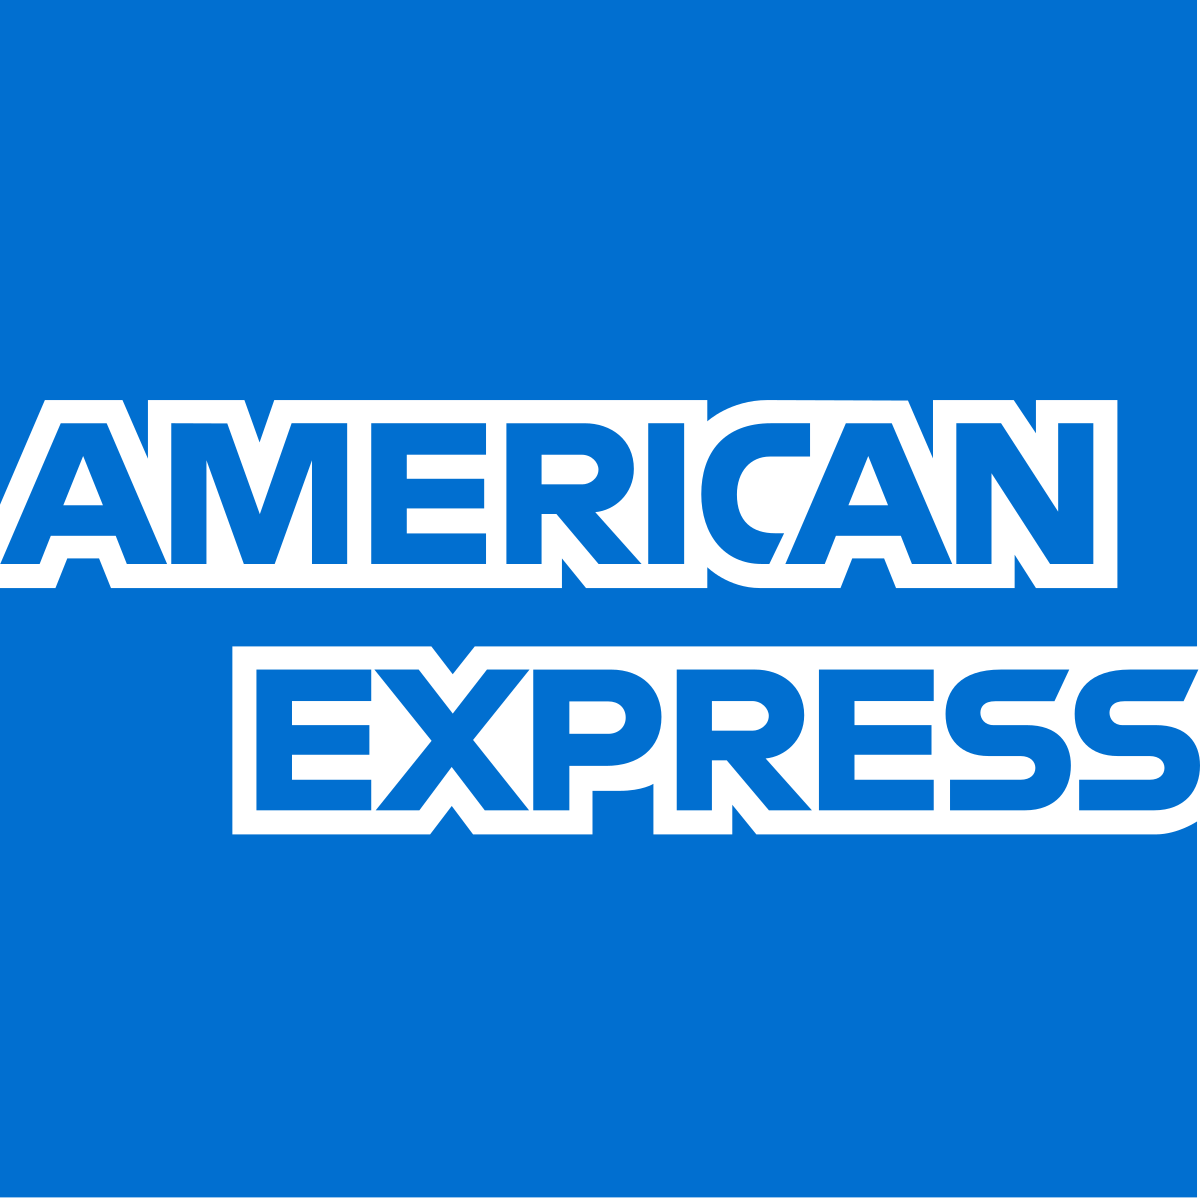

#### DATA VISUALIZATION FINDINGS :

## <span style ='color:#FCA510'> VISA TIMES-SERIES FINDINGS?

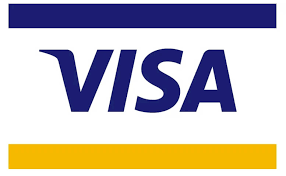

#### DATA VISUALIZATION FINDINGS :

#  <span style ='color:#74B72E'> TIME SERIES MODELING

## <span style ='color:#FCA510'>TRAIN

### <span style ='color:#757C88'> Last Observed Value



### <span style ='color:#757C88'>Simple Average

### <span style ='color:#757C88'>Moving Average

### <span style ='color:#757C88'>Previous Cycle

### <span style ='color:#757C88'>Holt's Linear Trend

### <span style ='color:#757C88'>Holt's Seasonal Trend

### TOP MODEL SELECTION: 

## <span style ='color:#FCA510'>TEST

## <span style ='color:#74B72E'> Findings: 
 

## <span style ='color:#241571'> NEXT STEPS



###  <span style ='color:#241571'> START OF NEXT STEPS
#### Time series 